<a href="https://colab.research.google.com/github/shreya-tss/Diabetes-Prediction-/blob/main/Diabetes_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # or DecisionTreeRegressor
from sklearn import metrics
import warnings

In [ ]:
Data = pd.read_csv("diabetes.csv")
Data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35,0,33.6,0.627,50.0,1
1,1.0,85,66,29,0,26.6,0.351,31.0,0
2,8.0,183,64,0,0,23.3,0.672,32.0,1
3,1.0,89,66,23,94,28.1,0.167,21.0,0
4,0.0,137,40,35,168,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101,76,48,180,32.9,0.171,63.0,0
764,2.0,122,70,27,0,36.8,0.340,27.0,0
765,5.0,121,72,23,112,26.2,0.245,30.0,0
766,1.0,126,60,0,0,30.1,0.349,47.0,1


In [ ]:
Data.describe() #convenient tool for getting various summary statistics about your data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,765.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,761.000000,768.000000
mean,3.853595,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.161629,0.348958
std,3.372898,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.720266,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
Data.isnull().sum()


Pregnancies                 3
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         7
Outcome                     0
dtype: int64

In [ ]:
mean_age=Data['Age'].mean()
mean_preg=Data['Pregnancies'].mode()
print(mean_age)
print(mean_preg)

33.16162943495401
0    1.0
Name: Pregnancies, dtype: float64


In [ ]:
Data['Age'].fillna(mean_age,inplace=True)
Data['Pregnancies'].fillna(0,inplace=True)

In [ ]:
Data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:

Data['BloodPressure'] = np.where(Data['BloodPressure'] == 0, 70, Data['BloodPressure'])

In [ ]:

Data['Insulin'] = np.where(Data['Insulin'] == 0, 18, Data['Insulin'])

In [ ]:

Data['Glucose'] = np.where(Data['Glucose'] == 0, 100, Data['Glucose'])

In [ ]:
Data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.838542,120.894531,72.295573,20.536458,79.799479,31.992578,0.471876,33.161629,0.348958
std,3.374878,31.972618,12.106756,15.952218,115.244002,7.884160,0.331329,11.666661,0.476951
min,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **EDA**

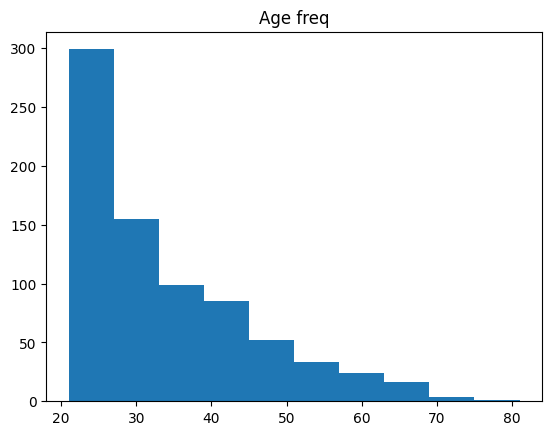

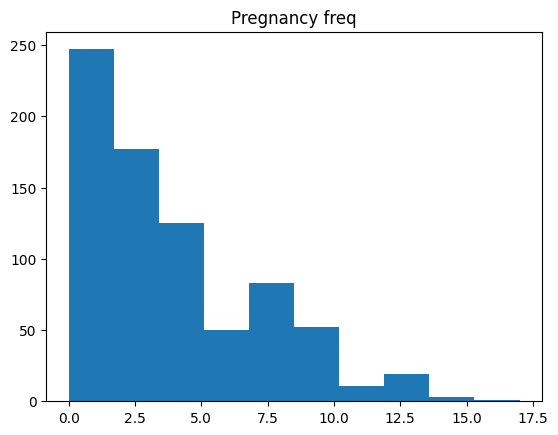

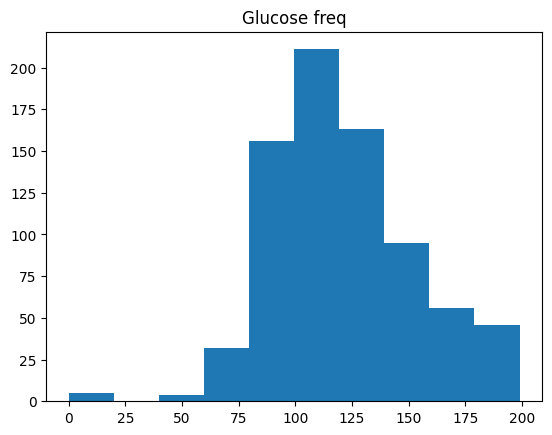

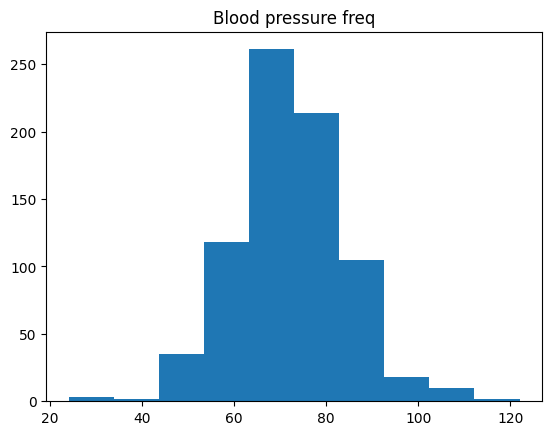

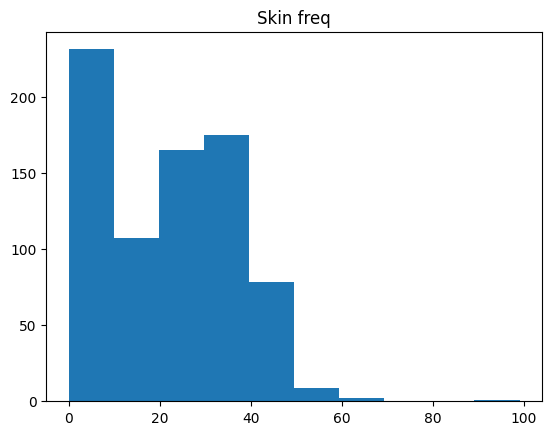

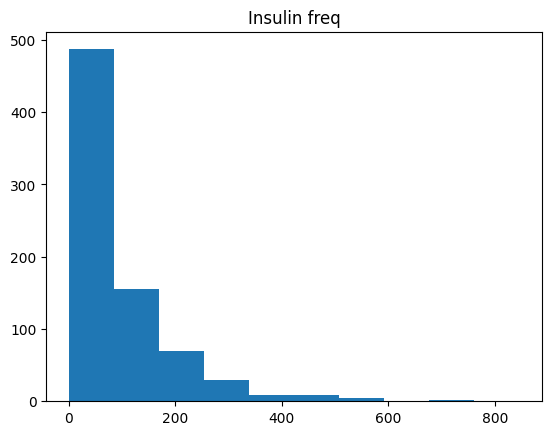

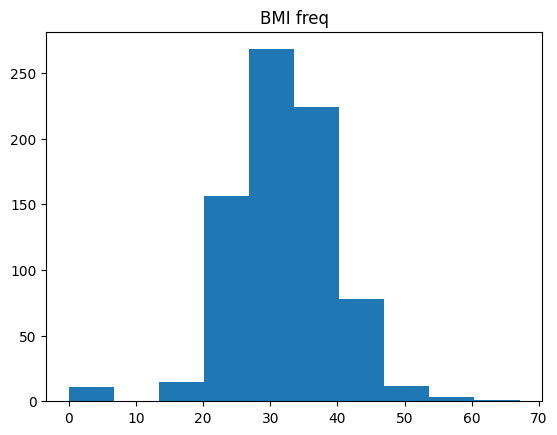

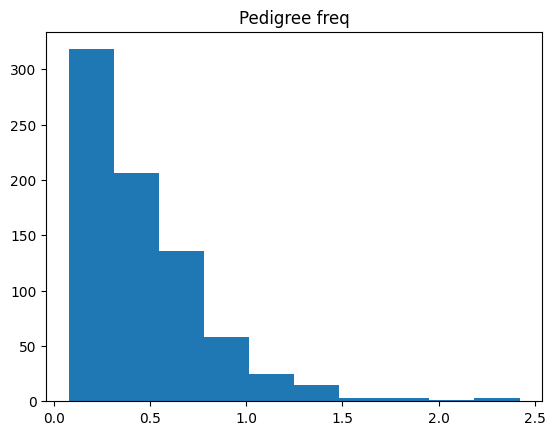

In [ ]:
import matplotlib.pyplot as plt

plt.hist(Data["Age"])
plt.title('Age freq')
plt.show()


plt.hist(Data["Pregnancies"])
plt.title('Pregnancy freq')
plt.show()


plt.hist(Data["Glucose"])
plt.title('Glucose freq')
plt.show()

plt.hist(Data["BloodPressure"])
plt.title('Blood pressure freq')
plt.show()

plt.hist(Data["SkinThickness"])
plt.title('Skin freq')
plt.show()

plt.hist(Data["Insulin"])
plt.title('Insulin freq')
plt.show()

plt.hist(Data["BMI"])
plt.title('BMI freq')
plt.show()

plt.hist(Data["DiabetesPedigreeFunction"])
plt.title('Pedigree freq')
plt.show()


In [ ]:
X = pd.DataFrame(Data, columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
y = Data.Outcome.values.reshape(-1,1)
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50.0
1,85,66,29,0,26.6,0.351,31.0
2,183,64,0,0,23.3,0.672,32.0
3,89,66,23,94,28.1,0.167,21.0
4,137,40,35,168,43.1,2.288,33.0
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63.0
764,122,70,27,0,36.8,0.340,27.0
765,121,72,23,112,26.2,0.245,30.0
766,126,60,0,0,30.1,0.349,47.0


# **DECISION TREE**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.3, random_state=1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3) # Quality of the splite based on "gini" for the gini impurity
clf= clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
len(y_test)

231

In [ ]:
import pandas as pd

newdf = pd.DataFrame()
newdf['Actual'] = pd.DataFrame(y_test)
newdf['Predicted'] = y_pred

In [ ]:
newdf

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
226,0,0
227,0,0
228,0,0
229,1,1


In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier


X_train, y_train = make_classification(n_samples=100, n_features=10, random_state=42)


clf = DecisionTreeClassifier()


rfe = RFE(estimator=clf, n_features_to_select=5, step=1)


rfe.fit(X_train, y_train)


selected_features = rfe.support_

print("Selected Features:", selected_features)


Selected Features: [False False  True  True False False False  True  True  True]


In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7575757575757576


# **VISUALIZATION**

In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, export_text


X, y = make_classification(n_samples=100, n_features=10, random_state=42)


clf = DecisionTreeClassifier()

clf.fit(X, y)

text_representation = export_text(clf)
print(text_representation)


|--- feature_2 <= 0.20
|   |--- feature_2 <= -0.30
|   |   |--- class: 0
|   |--- feature_2 >  -0.30
|   |   |--- feature_0 <= 0.09
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.09
|   |   |   |--- class: 1
|--- feature_2 >  0.20
|   |--- feature_3 <= 1.53
|   |   |--- class: 1
|   |--- feature_3 >  1.53
|   |   |--- class: 0



In [ ]:
with open ("description_tree.log", "w") as fout:
  fout.write(text_representation)

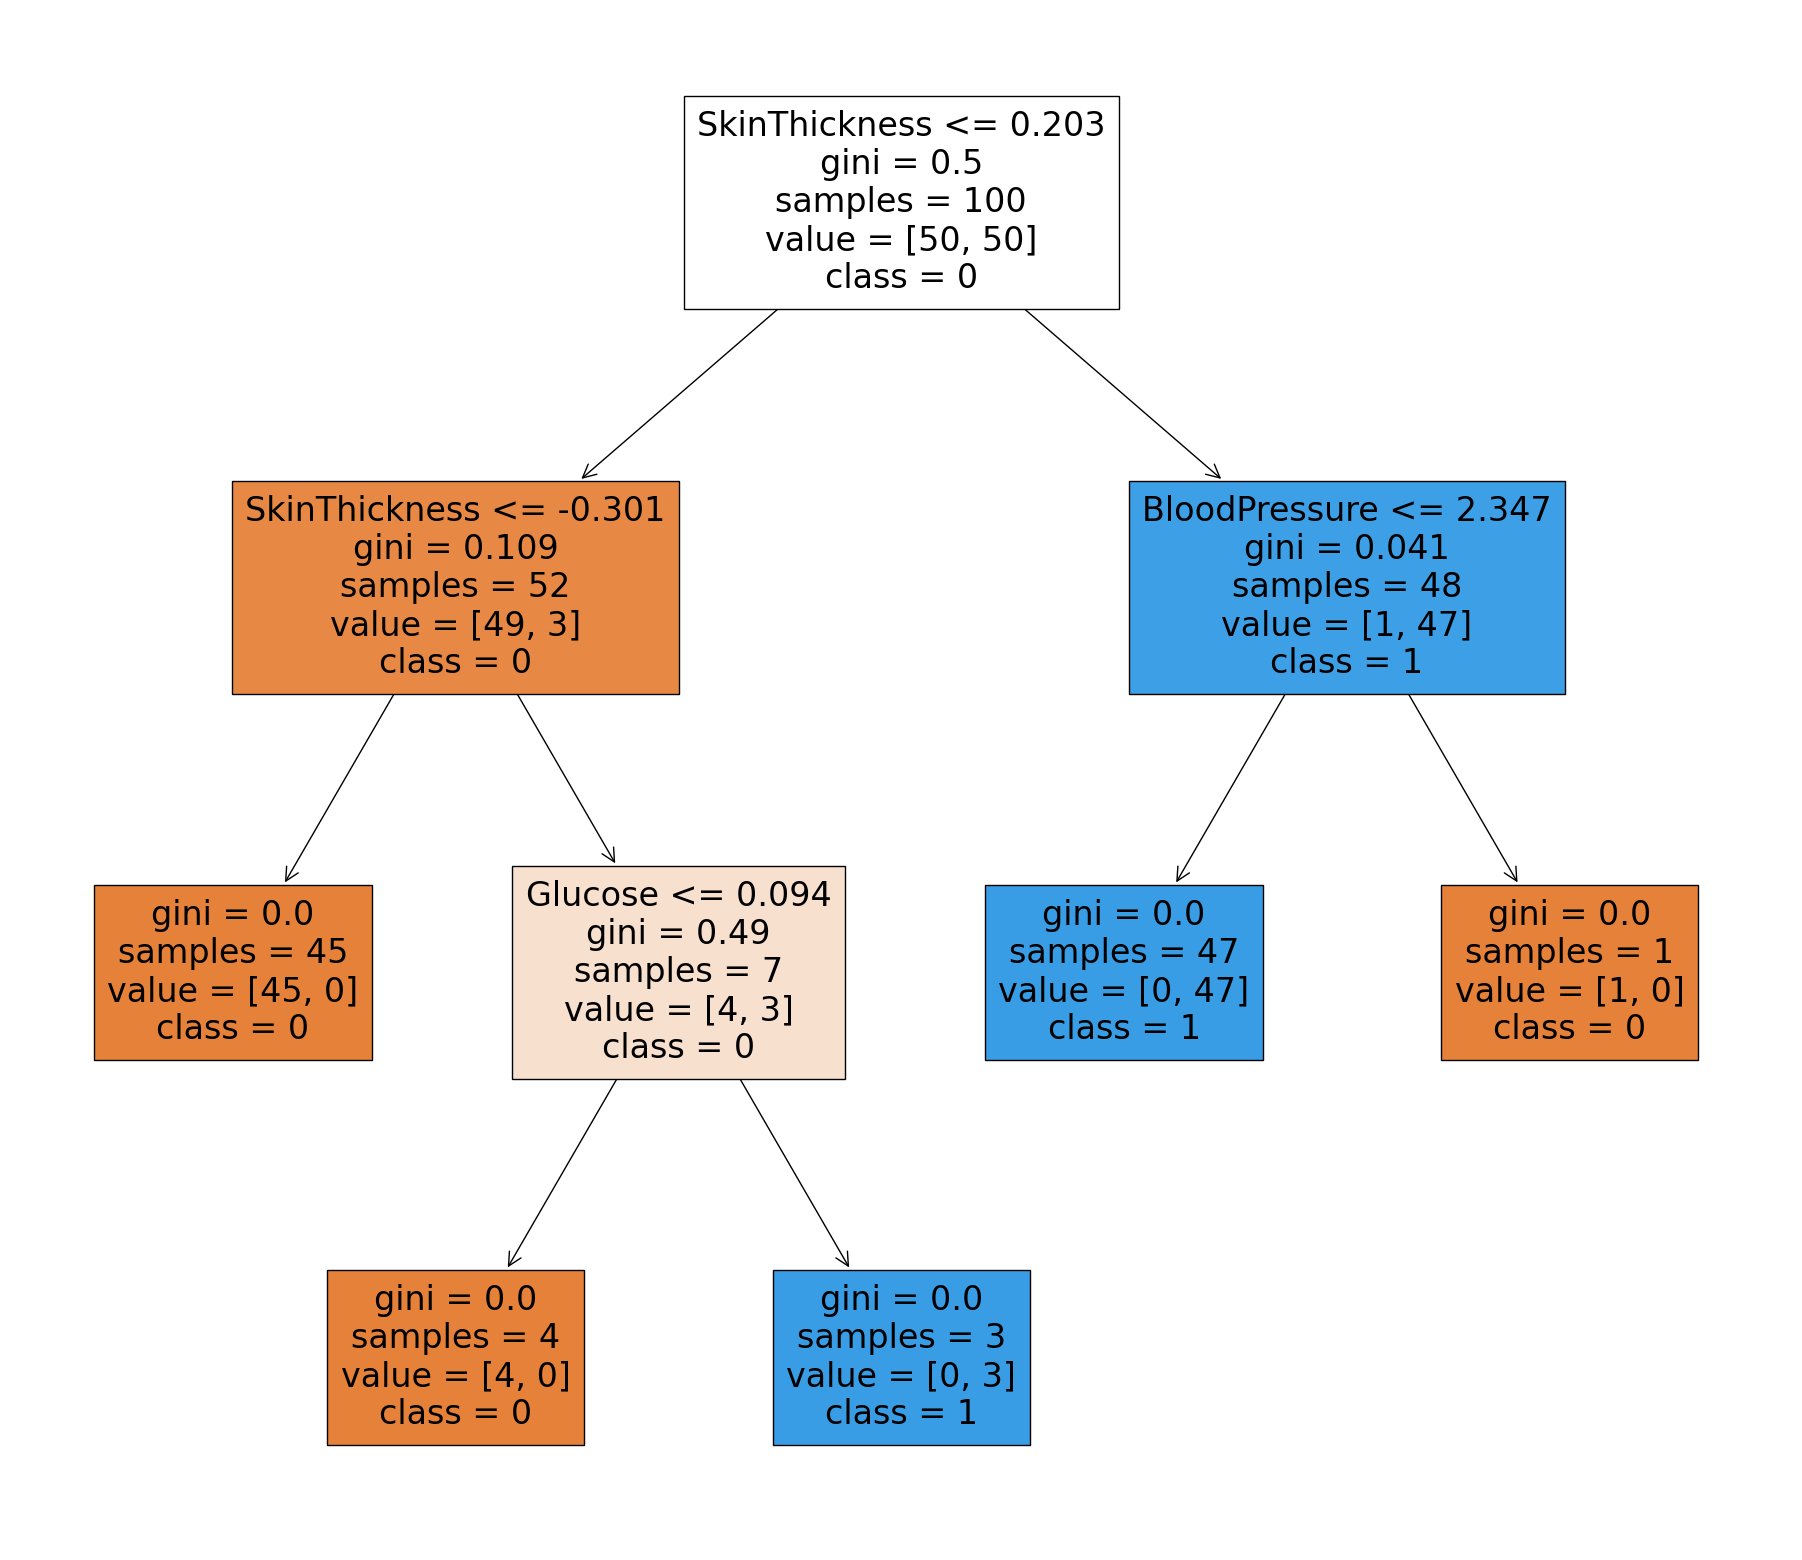

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(23, 20))
tree.plot_tree(clf,
               feature_names=feature_names,
               class_names=target_names,
               filled=True)
plt.show()

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


X, y = make_classification(n_samples=100, n_features=10, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = X_train[:, :7]
X_test = X_test[:, :7]

# Create a Decision Tree classifier with specified parameters
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict using the trained model
y_pred = clf.predict(X_test)

# Evaluate the model performance (if needed)
# For example, you can use accuracy_score, classification_report, etc.



In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8


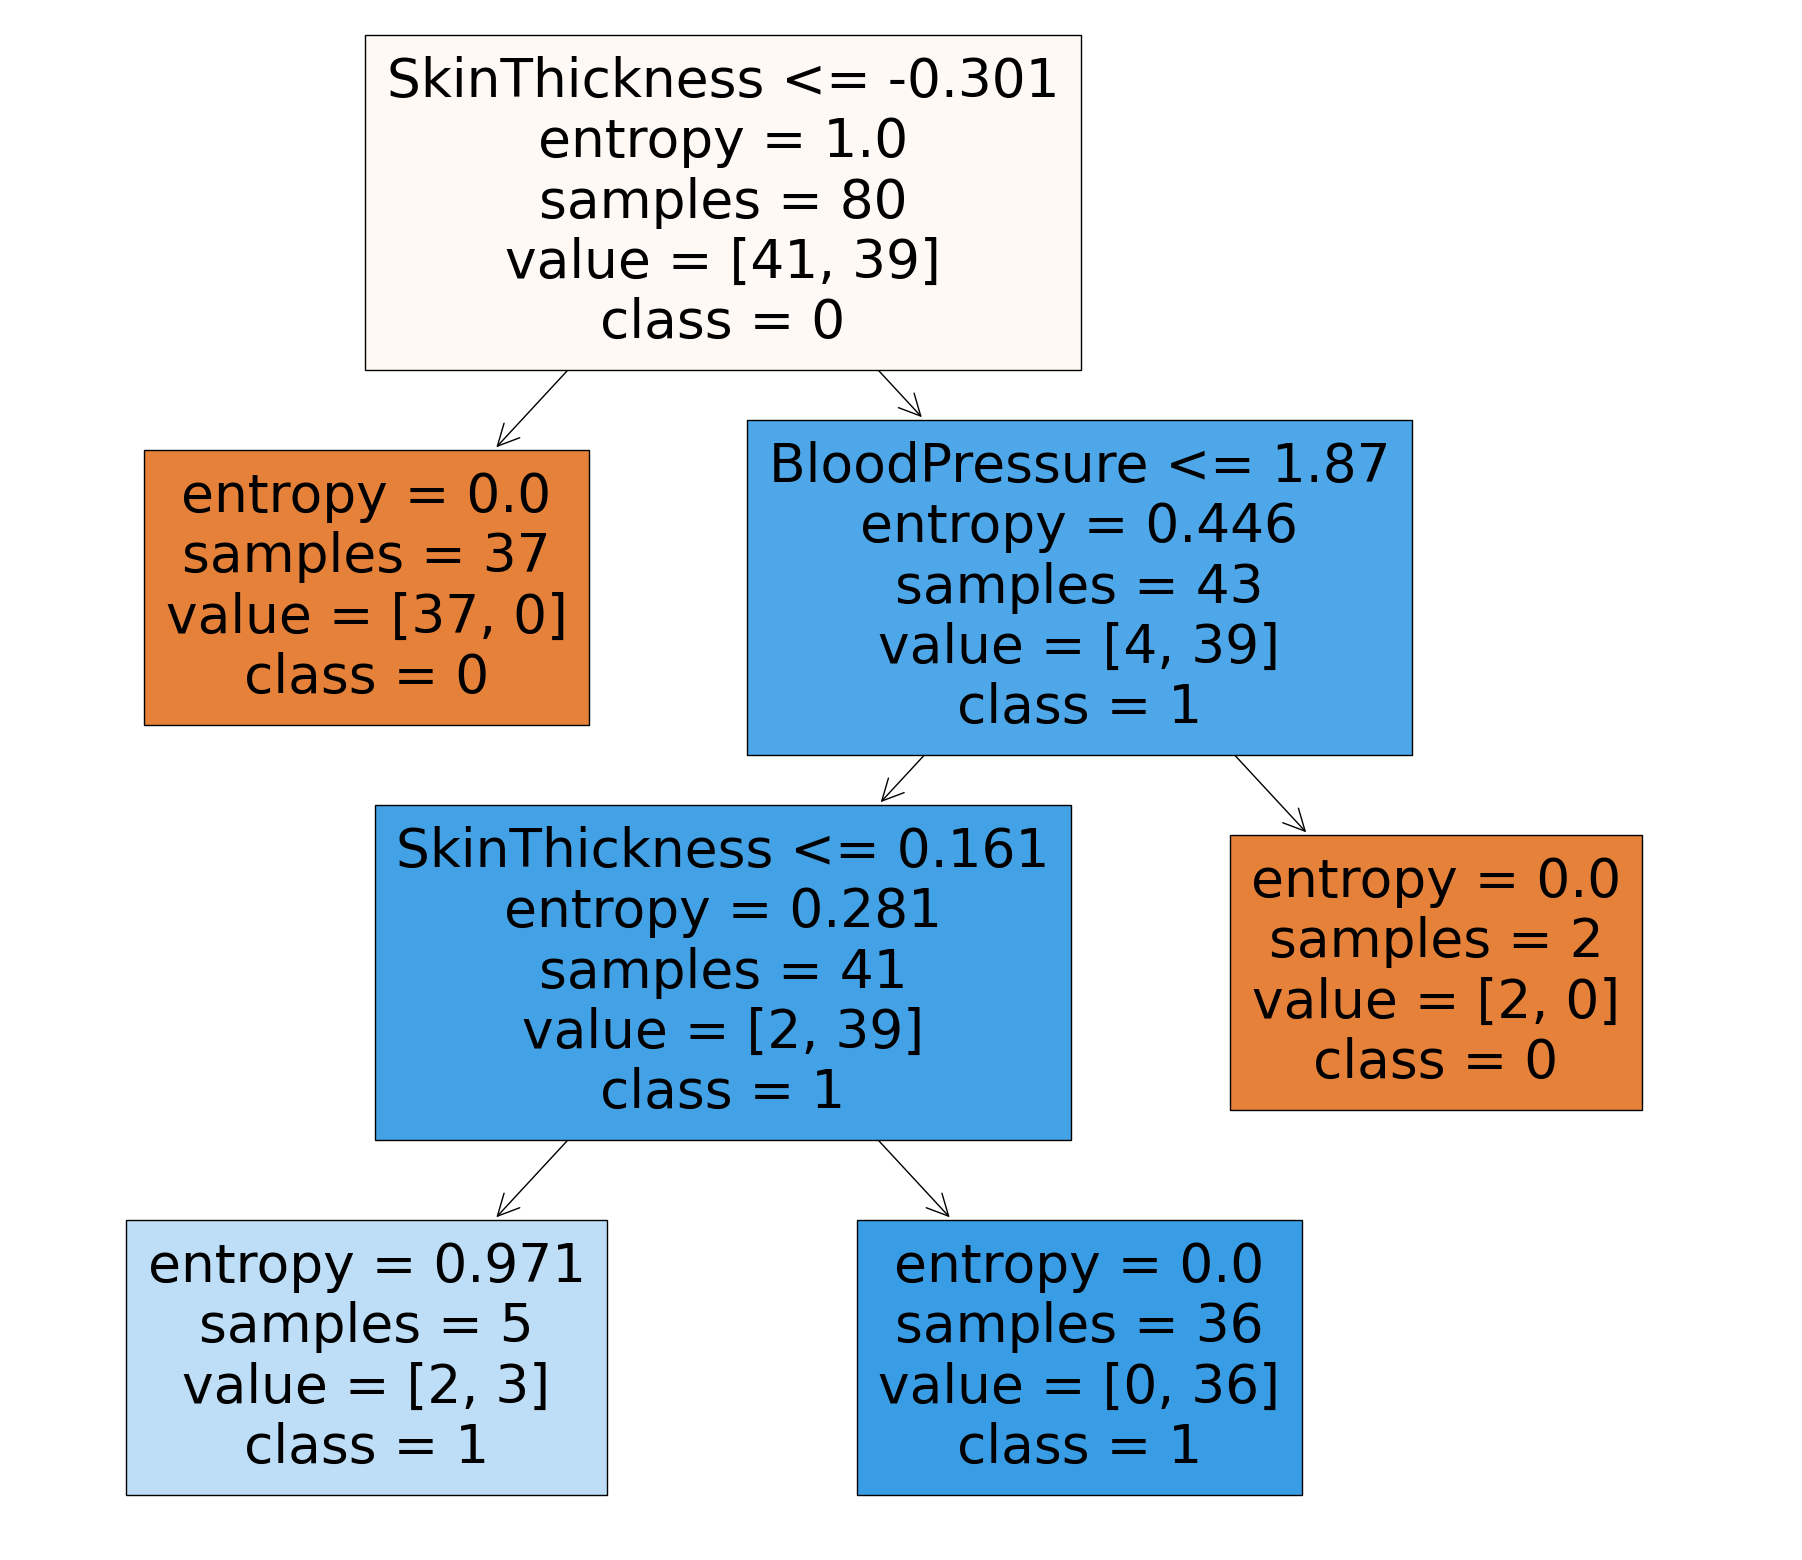

In [ ]:
feature_names = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target_names = ['0', '1']
fig= plt.figure(figsize=(23,20))
Plot = tree.plot_tree(clf,
                      feature_names= feature_names,
                      class_names = target_names,
                      filled = True)
fig.savefig('Tree2.png')

# **Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[12  2]
 [ 0 16]]


0.9333333333333333

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Split data into training and testing sets (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [20,50,100, 200, 300],  # Number of trees in the forest
    'max_depth': [4, 8, 12],        # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split a node
}

# Create the Random Forest model (unfitted for GridSearchCV)
clf = RandomForestClassifier()

# Create GridSearchCV object with Random Forest model and hyperparameter grid
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring="accuracy")

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Get the best model with tuned hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the testing set using the best model
y_pred = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  3]
 [ 0 16]]


0.9

[[11  3]
 [ 0 16]]


0.9